# Magnetic Field Profiles


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Load magnetic field profiles for dipole (d) and guassian (g) field prescriptions.

In [2]:
g_mag  = np.genfromtxt('files/gauss.mag')
d_mag  = np.genfromtxt('files/dipole.mag')
d2_mag = np.genfromtxt('files/dipole_r50.mag') 

Now we can load other files containing the density structures.

In [3]:
g_grad = np.genfromtxt('files/gauss.grad')
d_grad = np.genfromtxt('files/dipole.grad')

For particular types of instabilities, we are concerned with the radial variation of $B/\rho$. 

In [4]:
d2_B = (d2_mag[:,-1] + np.log10(8.0*np.pi))/2.0 # dipole peaking at R = 0.5 Rstar

btach = 5.0e3*np.exp(0.5*(0.5/0.2)**2) 
g2_B  = np.empty(g_mag.shape[0])
for i in range(g2_B.shape[0]):
    g2_B[i] = btach * np.exp(-0.5*((0.5 - 10**(g_grad[i,0] - 10.26))/0.2)**2) # Gaussian peaking at R = 0.5 Rstar

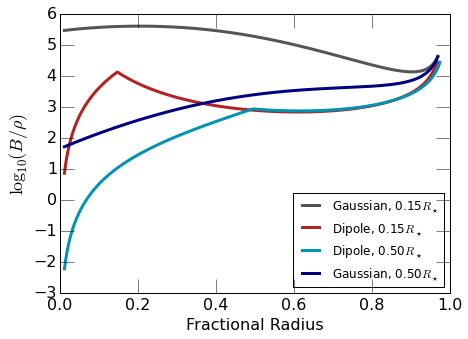

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(7., 5.))

ax.tick_params(which='major', axis='both', labelsize=16., length=14.)
ax.set_xlabel('Fractional Radius', fontsize=16.)
ax.set_ylabel('$\\log_{10}( B / \\rho )$', fontsize=18.)

ax.plot(10**(g_grad[:,0] - 10.26), g_mag[:,1] - g_grad[:,1], lw=3, c='#555555', label='Gaussian, 0.15$R_{\\star}$')
ax.plot(10**(d_grad[:,0] - 10.25), d_mag[:,1] - d_grad[:,1], lw=3, c='#b22222', label='Dipole, 0.15$R_{\\star}$')
ax.plot(10**(d2_mag[:,0] - 10.26), d2_B - d2_mag[:,2], lw=3, c='#0094b2', label='Dipole, 0.50$R_{\\star}$')
ax.plot(10**(g_grad[:,0] - 10.26), np.log10(g2_B) - g_grad[:, 1], lw=3, c='#000080', label='Gaussian, 0.50$R_{\\star}$')
ax.legend(loc=4)

Regions where $B/\rho$ has a negative slope are unstable to interchange modes. This is a significant problem for the Guassian radial field profile, which has should be unstable to interchange modes between 75% of the star, by radius. By constrast, however, the dipole magnetic field profile is only unstable over about 35% of the stellar interior, when the peak magnetic field is placed at $R = 0.15R_{\star}$. 

For both the Gaussian and the dipole radial profiles, this can be mitigated by shifting the peak field strength to $R = 0.50R_{\star}$, shown by the light and dark blue lines. We adopted this peak magnetic field location in Feiden & Chaboyer ([2014, A&A, 571, A70](http://adsabs.harvard.edu/abs/2014A%26A...571A..70F)) and found that we were able to generate necessary structrual changes to the models to reproduce the properties of CM Dra. Peak magnetic field strengths, in these instances, were around 40 kG and 113 kG for the dipole and Gaussian profiles, repsectively. Although this was more of an aside in the text, we have shown that field configurations with sub-MG magnetic fields and seeming stability to interchange modes can induce required radius changes.

Estimate growth rate of instability, $\tau \propto H_p/v_a$.

In [6]:
Hp = 1.0e10  # rough approximation for deep interior
va_d = 10**d_mag[:,1]/np.sqrt(4.0*np.pi*10**d_grad[:,1])
va_g = 10**g_mag[:,1]/np.sqrt(4.0*np.pi*10**g_grad[:,1])

Plot as a function of depth in the star, based on magnetic field profiles.

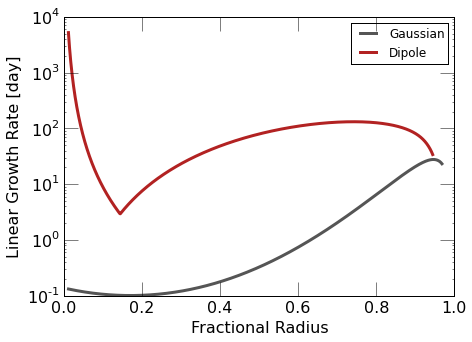

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(7., 5.))

ax.tick_params(which='major', axis='both', labelsize=16., length=14.)
ax.set_xlabel('Fractional Radius', fontsize=16.)
ax.set_ylabel('Linear Growth Rate [day]', fontsize=16.)

ax.semilogy(10**(g_grad[:,0] - 10.26), Hp/va_g/86400., lw=3, c='#555555', label='Gaussian')
ax.semilogy(10**(d_grad[:,0] - 10.26), Hp/va_d/86400., lw=3, c='#b22222', label='Dipole')
ax.legend(loc=1)

Growth of instabilities are slower in the Dipole configuration due to an increase in the Alfvén crossing time resulting from weaker magnetic fields, as compared to the Guassian profile. Instabilities grow rapidly in the deeper interior for the Gaussian profile, on timesales of about 1000 - 10,000 s (hours). In the dipole case, instabilities grow within about 100,000 s (days).

One should also compare the local Alfvén velocity to convective velocities.

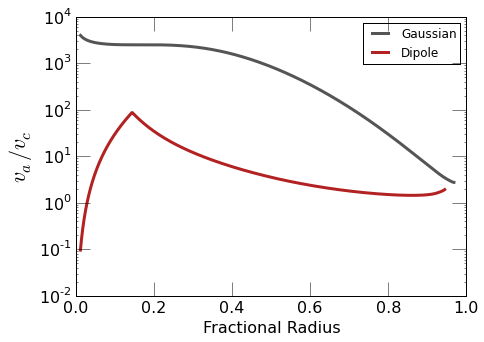

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7., 5.))

ax.tick_params(which='major', axis='both', labelsize=16., length=14.)
ax.set_xlabel('Fractional Radius', fontsize=16.)
ax.set_ylabel('$v_a / v_c$', fontsize=22.)

ax.semilogy(10**(g_grad[:,0] - 10.26), va_g/g_grad[:,-1], lw=3, c='#555555', label='Gaussian')
ax.semilogy(10**(d_grad[:,0] - 10.26), va_d/d_grad[:,-1], lw=3, c='#b22222', label='Dipole')
ax.legend(loc=1)

Based on our prescriptions, the local Alfvén velocity is always greater than the convective velocity in regions susceptible to instabilities. Therefore, instabilities should not be affected too significantly by the presence of convective modes. There may be coupling of the modes in some regions of the dipole profile model, where $v_a \sim v_c$ at locations between $0.3 < R/R_{\star} 0.6$.